In [17]:
import pickle, os

In [18]:
folder_name = '29-09-2020_15-20'
test_name = 'gp_3c'
fold_num = 2

dir = os.getcwd() + '/Plots/' + folder_name + '/' + test_name + '/cs_data.json'
filehandler = open(dir, 'rb')
dt = pickle.load(filehandler)

In [30]:
for key in dt[fold_num]['GC'].keys():
    print(key)

(('tertiary', 'unknown'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('married', 'divorced'), ('no',), ('no',), ('no',), 'balance >= 195 & balance <= 804', 'age >= 18 & age <= 25')
(('secondary', 'primary'), ('student', 'retired'), ('single',), ('no',), ('no',), ('no',), 'balance >= 13113 & balance <= 105000', 'age >= 18 & age <= 25')
(('tertiary', 'unknown'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('married', 'divorced'), ('no',), ('yes',), ('yes',), 'balance >= -10000 & balance <= -46', 'age >= 60 & age <= 87')
(('tertiary', 'unknown'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('single',), ('no',), ('no',), ('no',), 'balance >= -45 & balance <= 194', 'age >= 60 & age <= 87')
(('tertiary', 'unknown'

In [41]:
all_cs = list(dt[fold_num]['GC'].keys())
print(all_cs[0])

(('tertiary', 'unknown'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('married', 'divorced'), ('no',), ('no',), ('no',), 'balance >= 195 & balance <= 804', 'age >= 18 & age <= 25')


In [108]:
segment = dt[fold_num]['GC'][key_to_plot]

In [109]:
segment

{'max_loc': 0,
 'best_rate': 0,
 'overall_rate': 0.05466052934407365,
 'n_rows': 695,
 'results': [{'succ': 42,
   'total_calls': 695,
   'expected': 0.060431654676258995},
  {'succ': 69, 'total_calls': 1083, 'expected': 0.06371191135734072},
  {'succ': 84, 'total_calls': 1287, 'expected': 0.06526806526806526},
  {'succ': 89, 'total_calls': 1412, 'expected': 0.06303116147308782},
  {'succ': 91, 'total_calls': 1499, 'expected': 0.06070713809206137},
  {'succ': 94, 'total_calls': 1553, 'expected': 0.06052801030264005},
  {'succ': 94, 'total_calls': 1586, 'expected': 0.05926860025220681},
  {'succ': 94, 'total_calls': 1611, 'expected': 0.05834885164494103},
  {'succ': 94, 'total_calls': 1629, 'expected': 0.057704112952731736},
  {'succ': 95, 'total_calls': 1644, 'expected': 0.05778588807785888},
  {'succ': 95, 'total_calls': 1655, 'expected': 0.05740181268882175},
  {'succ': 95, 'total_calls': 1664, 'expected': 0.05709134615384615},
  {'succ': 95, 'total_calls': 1672, 'expected': 0.056818

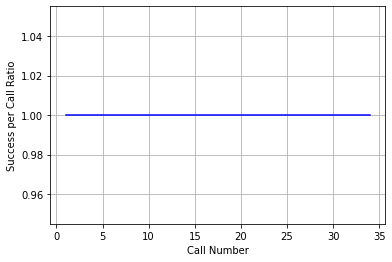

In [23]:
import matplotlib.pyplot as plt

plt.ylabel("Success per Call Ratio")
plt.xlabel("Call Number")
calls = [i for i in range(1,35)]
ratios = [point['expected'] for point in segment['results']]
plt.plot(calls, ratios, label='Test', linewidth=1.5, color = 'blue')
plt.grid(True)
plt.show()

In [24]:
max_calls = -1
max_key = None
for key in all_cs:
    segment = dt[fold_num]['GC'][key]['results']
    if segment[-1]['total_calls'] > max_calls:
        max_calls = segment[-1]['total_calls']
        max_key = key

In [25]:
max_calls

7041

In [26]:
max_key

(('secondary', 'primary'),
 ('unemployed',
  'admin.',
  'management',
  'self-employed',
  'technician',
  'unknown',
  'services',
  'housemaid',
  'blue-collar',
  'entrepreneur'),
 ('married', 'divorced'),
 ('no',),
 ('no',),
 ('yes',),
 'balance >= 805 & balance <= 13112',
 'age >= 26 & age <= 59')

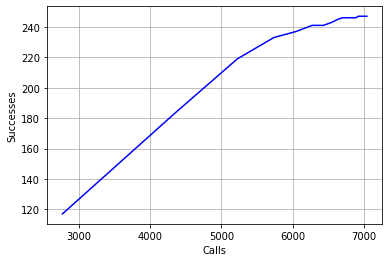

In [35]:
import matplotlib.pyplot as plt

plt.ylabel("Successes")
plt.xlabel("Calls")
calls = [point['succ'] for point in dt[fold_num]['GC'][max_key]['results']]
succ = [point['total_calls'] for point in dt[fold_num]['GC'][max_key]['results']]
plt.plot(succ, calls, label='Test', linewidth=1.5, color = 'blue')
plt.grid(True)
plt.show()

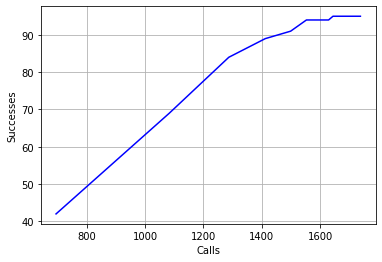

In [39]:
# This was used in paper for showing the difference with convex hull approach.
key_to_plot = (('tertiary', 'unknown'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('single',), ('no',), ('no',), ('yes',), 'balance >= 805 & balance <= 13112', 'age >= 26 & age <= 59')

import matplotlib.pyplot as plt

plt.ylabel("Successes")
plt.xlabel("Calls")
calls = [point['succ'] for point in dt[fold_num]['GC'][key_to_plot]['results']]
succ = [point['total_calls'] for point in dt[fold_num]['GC'][key_to_plot]['results']]
plt.plot(succ, calls, label='Test', linewidth=1.5, color = 'blue')
plt.grid(True)
plt.show()

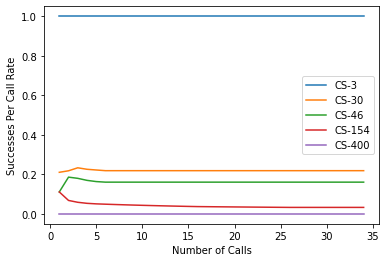

In [107]:
# This was used in paper for showing various 
key1 = all_cs[2]
key2 = all_cs[29]
key3 = all_cs[45]
key4 = all_cs[153]
key5 = all_cs[399]

import matplotlib.pyplot as plt

plt.ylabel("Successes Per Call Rate")
plt.xlabel("Number of Calls")

calls = [i for i in range (1,35)]

succ = [point['expected'] for point in dt[fold_num]['GC'][key1]['results']]
plt.plot(calls, succ, label='CS-3', linewidth=1.5)

succ = [point['expected'] for point in dt[fold_num]['GC'][key2]['results']]
plt.plot(calls, succ, label='CS-30', linewidth=1.5)

succ = [point['expected'] for point in dt[fold_num]['GC'][key3]['results']]
plt.plot(calls, succ, label='CS-46', linewidth=1.5)

succ = [point['expected'] for point in dt[fold_num]['GC'][key4]['results']]
plt.plot(calls, succ, label='CS-154', linewidth=1.5)

succ = [point['expected'] for point in dt[fold_num]['GC'][key5]['results']]
plt.plot(calls, succ, label='CS-400', linewidth=1.5)

plt.grid(False)
plt.legend()
plt.savefig('all.pdf')

In [70]:
key1

(('tertiary', 'unknown'),
 ('unemployed',
  'admin.',
  'management',
  'self-employed',
  'technician',
  'unknown',
  'services',
  'housemaid',
  'blue-collar',
  'entrepreneur'),
 ('married', 'divorced'),
 ('no',),
 ('no',),
 ('no',),
 'balance >= 195 & balance <= 804',
 'age >= 18 & age <= 25')

In [71]:
key2

(('secondary', 'primary'),
 ('unemployed',
  'admin.',
  'management',
  'self-employed',
  'technician',
  'unknown',
  'services',
  'housemaid',
  'blue-collar',
  'entrepreneur'),
 ('single',),
 ('no',),
 ('no',),
 ('no',),
 'balance >= 805 & balance <= 13112',
 'age >= 18 & age <= 25')

In [95]:
key4

(('tertiary', 'unknown'),
 ('student', 'retired'),
 ('single',),
 ('no',),
 ('no',),
 ('yes',),
 'balance >= 805 & balance <= 13112',
 'age >= 26 & age <= 59')

In [98]:
key5

(('tertiary', 'unknown'),
 ('student', 'retired'),
 ('married', 'divorced'),
 ('yes',),
 ('yes',),
 ('no',),
 'balance >= 805 & balance <= 13112',
 'age >= 18 & age <= 25')